## IMPORTING LIBRARIES

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## LOADING THE DATASET

In [2]:
df=pd.read_csv('mh.csv')
df

,Gender,Age,Area_of_living,Feel_1st.Lockdown,Health_affected,Enjoyment_of_lockdown,new_varient.(omicron),feel_Lockdown.again,feel_loneliness,miss_the_most,Effect_of_online_edu,Effect_of_financial.status,Depression_or_stress,Reason_for_stress,Overcome_stress
0,Male,21,Rural,4,Maybe,4,Yes,2,No,Friends,Maybe,Yes,No,Missing college/school life,Yes
1,Male,21,Rural,4,No,5,Yes,5,No,Friends,Yes,No,No,Not seeing friends/loved one,Yes
2,Female,18,Urban,3,Maybe,3,Yes,3,Maybe,Friends,Yes,Yes,No,Missing college/school life,Yes
3,Male,21,Urban,5,No,5,Yes,5,No,Friends,No,Yes,No,Worried about my carrier,Yes
4,Male,21,Urban,3,No,4,No,5,No,Loved one,Maybe,Maybe,No,Worried about my carrier,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Male,21,Rural,3,No,4,Yes,3,No,Friends,Maybe,Maybe,No,Worried about my carrier,Yes
124,Male,21,Rural,3,No,2,Yes,3,Yes,Loved one,Yes,Yes,Yes,Worried about my carrier,Yes
125,Male,21,Urban,5,Yes,3,Yes,5,No,Other relations,No,Yes,No,financial problem,Yes
126,Female,20,Rural,1,No,1,Yes,1,Yes,Friends,Yes,No,Yes,Worried about my carrier,Yes


## DATA PRE-PROCESSING

In [3]:
df.isna().sum()

Gender                        0
Age                           0
Area_of_living                0
Feel_1st.Lockdown             0
Health_affected               0
Enjoyment_of_lockdown         0
new_varient.(omicron)         0
feel_Lockdown.again           0
feel_loneliness               0
miss_the_most                 0
Effect_of_online_edu          0
Effect_of_financial.status    0
Depression_or_stress          0
Reason_for_stress             0
Overcome_stress               0
dtype: int64

In [4]:
df.columns

Index(['Gender', 'Age', 'Area_of_living', 'Feel_1st.Lockdown',
       'Health_affected', 'Enjoyment_of_lockdown', 'new_varient.(omicron)',
       'feel_Lockdown.again ', 'feel_loneliness', 'miss_the_most',
       'Effect_of_online_edu', 'Effect_of_financial.status',
       'Depression_or_stress', 'Reason_for_stress', 'Overcome_stress'],
      dtype='object')

NOTE : This dataset has no null values and duplicate values now. So further processing will not be done such as replacing or deleting a null rows. So data is ready for traning, before training we visualise the data.

## EXPLORATORY DATA ANALYSIS

### Count Plots
Show the counts of observations in each categorical bin using bars.

<AxesSubplot:title={'center':'REASON FOR STRESS'}, xlabel='Reason_for_stress', ylabel='count'>

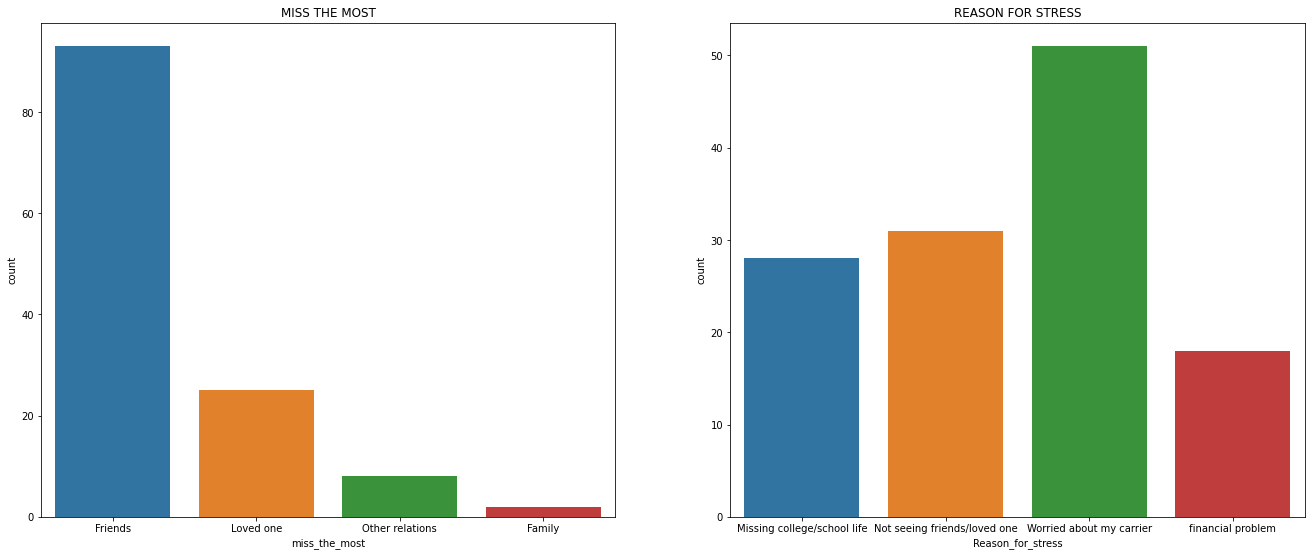

In [5]:
fig = plt.figure(figsize=(35,20))

#  subplot #1
plt.subplot(231)
plt.title('MISS THE MOST')
sb.countplot(data = df, x='miss_the_most')

#  subplot #2
plt.subplot(2,3,2)
plt.title('REASON FOR STRESS')
sb.countplot(data = df, x='Reason_for_stress')

### Lable Encoding

In [6]:
#To give numerical values for categorical variables

columns = ['Gender','Area_of_living','Health_affected','new_varient.(omicron)','feel_loneliness',
           'miss_the_most','Effect_of_online_edu','Effect_of_financial.status','Depression_or_stress',
           'Reason_for_stress','Overcome_stress']
encoder=LabelEncoder()
for i in columns:
    df[i] = encoder.fit_transform(df[i])

### Heat Map

<AxesSubplot:>

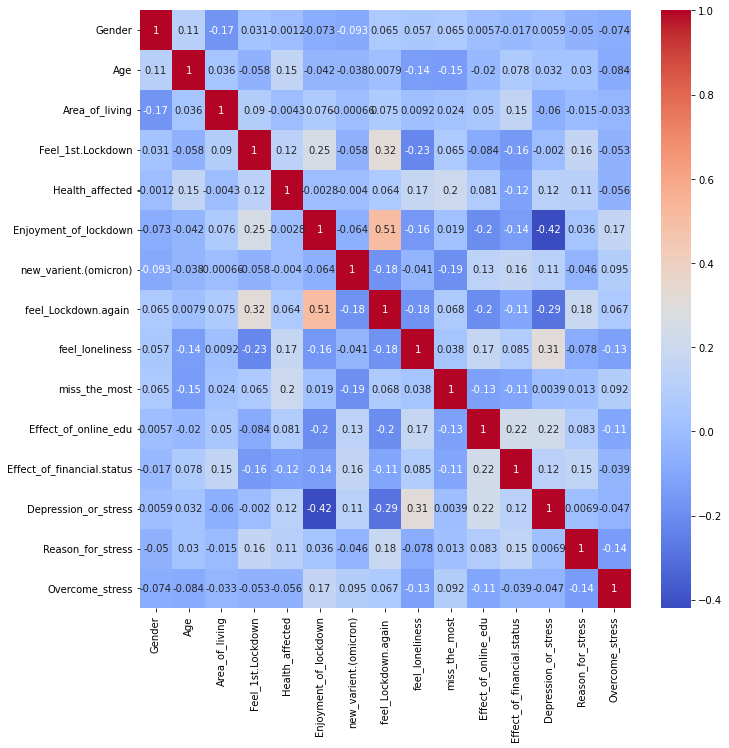

In [7]:
#to see the relation of variaables using correlation
plt.figure(figsize=(11,11))
sb.heatmap(df.corr(),annot=True,cmap='coolwarm')

### Pairs Plot

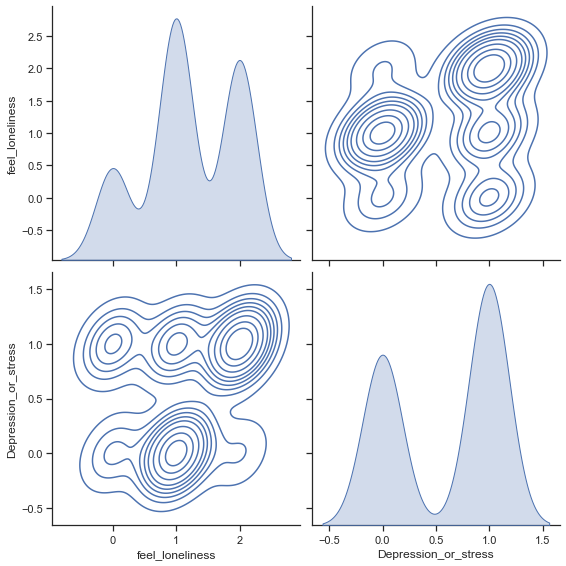

In [8]:
sb.set(style='ticks')
sb.pairplot(df,vars=['feel_loneliness','Depression_or_stress']
            ,height=4,kind="kde",palette='husl')

## DATA MODELING

### Future Selection

In [9]:
df.drop(columns=['Age','Gender','Area_of_living','Feel_1st.Lockdown',
                   'miss_the_most','Reason_for_stress','Overcome_stress'],axis=1,inplace=True)

### Data Normalization

In [10]:
df_norm = (df-df.min())/ (df.max() - df.min())
df_norm.head()

,Health_affected,Enjoyment_of_lockdown,new_varient.(omicron),feel_Lockdown.again,feel_loneliness,Effect_of_online_edu,Effect_of_financial.status,Depression_or_stress
0,0.0,0.75,1.0,0.25,0.5,0.0,1.0,0.0
1,0.5,1.00,1.0,1.00,0.5,1.0,0.5,0.0
2,0.0,0.50,1.0,0.50,0.0,1.0,1.0,0.0
3,0.5,1.00,1.0,1.00,0.5,0.5,1.0,0.0
4,0.5,0.75,0.0,1.00,0.5,0.0,0.0,0.0


### Split Train Test Dataset

In [11]:
x= df.drop(columns=['Depression_or_stress'],axis=1)
y= df['Depression_or_stress']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=100)

### Logistic Regression (Model 1)

In [12]:
Lr=LogisticRegression()
Lr.fit(x_train,y_train)
predict_lr=model.predict(x_test)
print(predict_lr)

NameError: name 'model' is not defined

In [13]:
#accuracy of the model1
score_lr=round((Lr.score(x_test,y_test)*100),2)
print("modelscore",score_lr,"%")

modelscore 88.46 %


### KNN (Model 2)

In [14]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train, y_train)
predict_knn=knn.predict(x_test)
print(predict_knn)

[0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0]


In [15]:
#accuracy of the model2
score_knn=round((knn.score(x_test,y_test)*100),2)
print("modelscore",score_knn,"%")

modelscore 76.92 %


### Decision Tree (Model 3)

In [16]:
D_tree = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=2, min_samples_leaf=2)
D_tree.fit(x_train, y_train)
predict_D_tree=D_tree.predict(x_test)
print(predict_D_tree)

[0 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1]


In [17]:
#accuracy of the model3
score_D_tree=round((D_tree.score(x_test,y_test)*100),2)
print("modelscore",score_D_tree,"%")

modelscore 65.38 %


### Model Comparison

In [18]:
#creating a new dataframe to see the accuracy score of different models created above
score = pd.DataFrame({'Logistic Regression':score_lr,'KNN':score_knn,'Decision Tree':score_D_tree},
                     index=['Model Accuracy:'])
score

,Logistic Regression,KNN,Decision Tree
Model Accuracy:,88.46,76.92,65.38


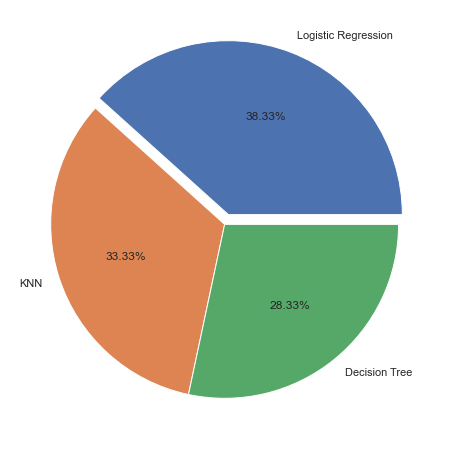

In [19]:
plt.figure(figsize=(15,8))
x_value = [88.46,76.92,65.38]
label = ['Logistic Regression','KNN','Decision Tree']
plt.pie(x_value,labels=label,explode = [0.060,0,0],autopct="%.2f%%")
plt.show()

From the above 3 models created , i got good accuracy score in Logistic Regression model compared to other models